In [1]:
from pymongo import MongoClient


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("sygnals_operations.csv")


In [3]:
#client = MongoClient('localhost', 27017)
# db=client["pasanti_test"]
#data= db.signals.find()
#list_data = list(data)


In [4]:
#df = pd.DataFrame(list_data)


In [5]:
# df.to_csv('sygnals_operations.csv')


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1126 entries, 0 to 1125
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              1126 non-null   int64  
 1   _id                     1126 non-null   object 
 2   symbol_message          1126 non-null   object 
 3   symbol                  1126 non-null   object 
 4   currencies              1126 non-null   object 
 5   is_future               1126 non-null   bool   
 6   is_long                 1126 non-null   bool   
 7   leverage                1126 non-null   object 
 8   percent_amount          1126 non-null   int64  
 9   is_entry_market         1126 non-null   bool   
 10  entry_targets           1126 non-null   object 
 11  take_profit_targets     1126 non-null   object 
 12  stop_targets            1126 non-null   object 
 13  trailing_configuration  1126 non-null   object 
 14  quantity                0 non-null      

In [7]:
df.channel.value_counts()


Crypto Futures Spot Signals😘         300
𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔                   300
Federal Russian Insiders VIP Free    298
Bitcoin Bullets VIP Free             228
Name: channel, dtype: int64

In [13]:
symbols_count = df[["symbol", "channel"]].value_counts().sort_values(ascending=False)
important_symbol = symbols_count.head(40)
type(important_symbol)


pandas.core.series.Series

In [14]:
symbols_count = df[["symbol", "channel"]]
important_symbol = symbols_count
important_symbol.groupby("channel").describe()


symbol                     
                                   count unique      top freq
channel                                                      
Bitcoin Bullets VIP Free             228     59  LTCUSDT   14
Crypto Futures Spot Signals😘         300    173  BTCUSDT   16
Federal Russian Insiders VIP Free    298     67  XRPUSDT   15
𝑪𝒐𝒊𝒏|𝑪𝒐𝒂𝒄𝒉|𝑺𝒊𝒈𝒏𝒂𝒍𝒔                   300    105  BELUSDT   15

<AxesSubplot:>

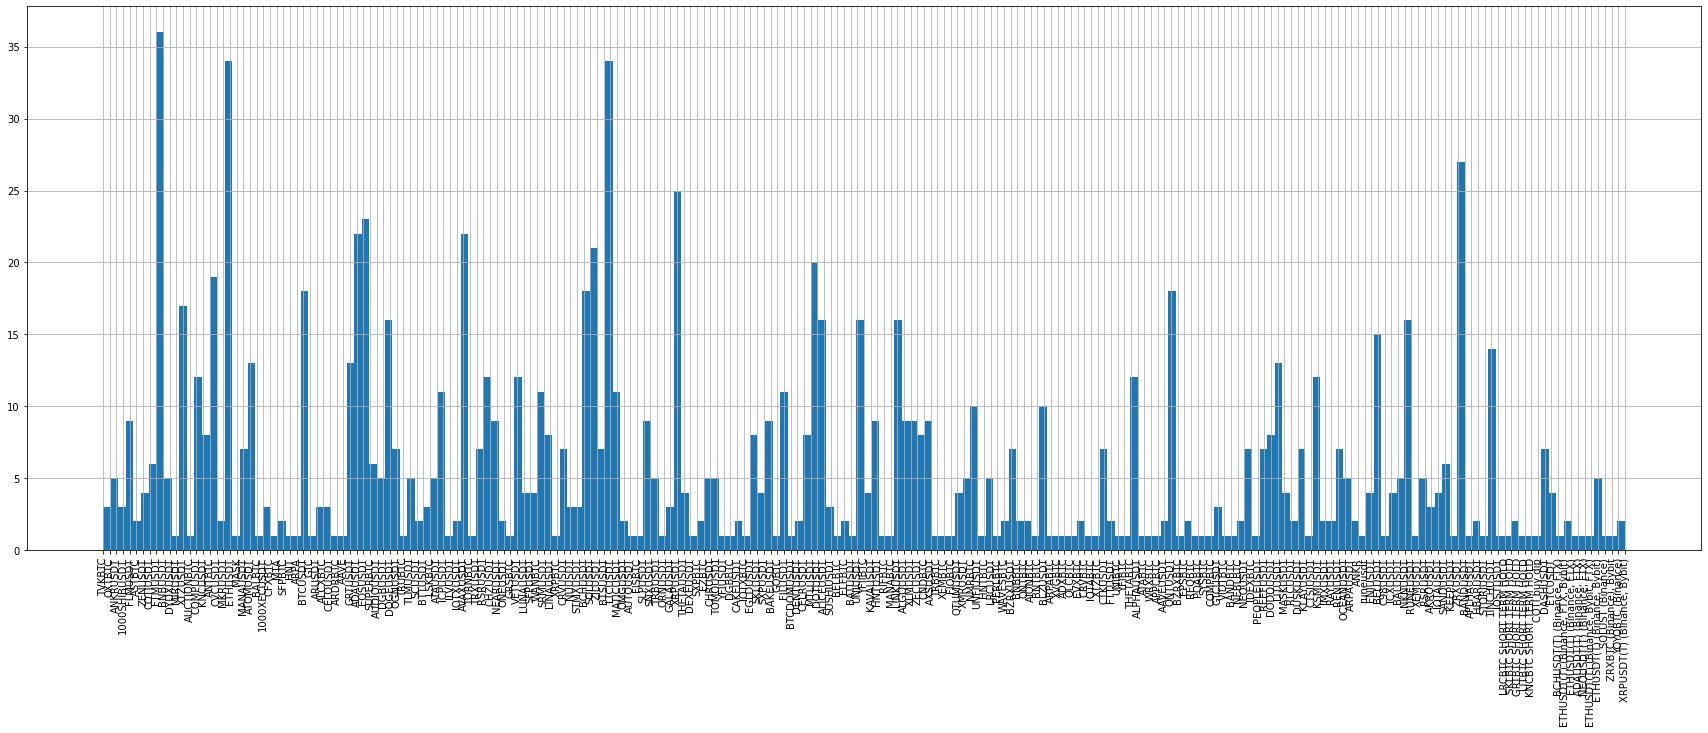

In [10]:
important_symbol["symbol"].hist(figsize=(30, 10),xrot=90, bins=200,)


<AxesSubplot:xlabel='symbol', ylabel='Count'>

/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 119914 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 119952 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 119946 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 119951 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 119938 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/joan/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: R

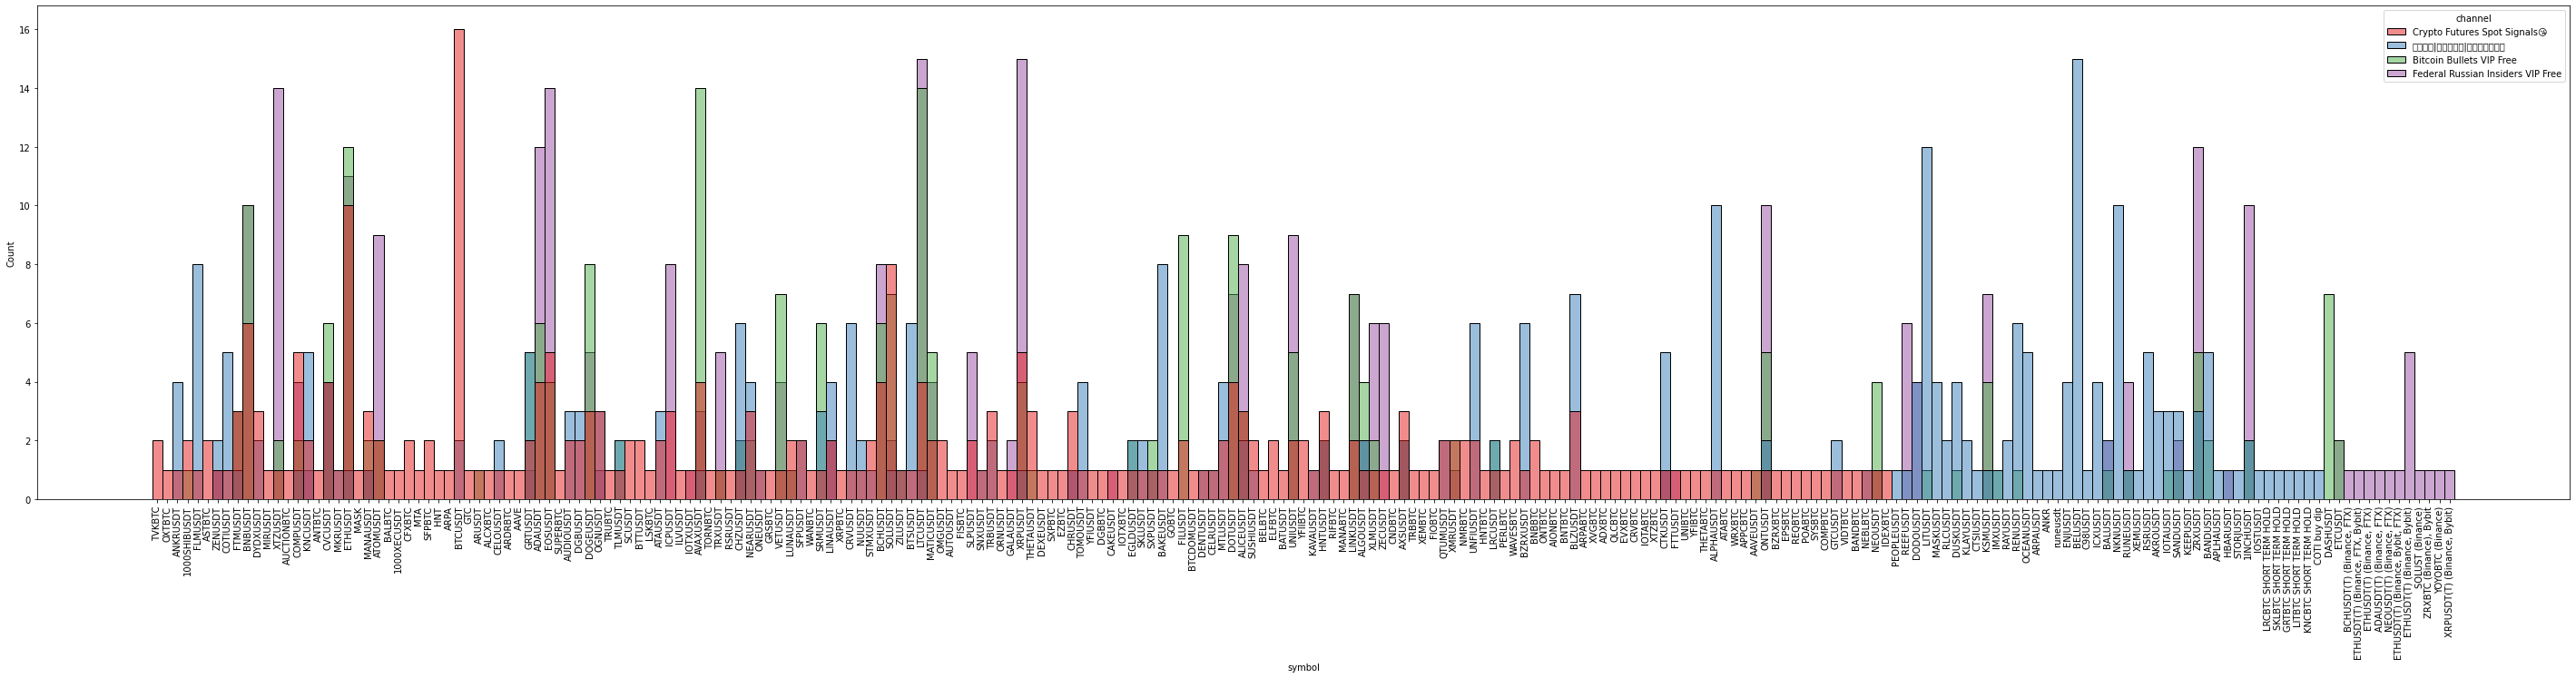

In [20]:
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
sns.histplot(data=important_symbol, x="symbol",hue="channel",palette="Set1")


In [12]:
df[df["currencies"] == {'primary': 'LTC', 'segundary': 'USDT'}]


,Unnamed: 0,_id,symbol_message,symbol,currencies,is_future,is_long,leverage,percent_amount,is_entry_market,...,take_profit_targets,stop_targets,trailing_configuration,quantity,quantity_take_profit,free,timeStamp_Tg,message_id,channel,channel_id


In [71]:
search_word="$"
symbol_line="Pair: $ETH/USD(T) (Binance, FTX, Bybit)"

In [72]:
before_symbol = symbol_line.partition(search_word)[0]
before_symbol

'Pair: '

In [73]:
if before_symbol:
    symbol_line = symbol_line.replace(before_symbol,'')
symbol_line

'$ETH/USD(T) (Binance, FTX, Bybit)'

In [74]:
seconds_currencies=("USD","USDT")

for currencie in seconds_currencies:
    if currencie in symbol_line:
        after_symbol = symbol_line.partition(currencie)[2]
after_symbol

'(T) (Binance, FTX, Bybit)'

In [75]:

symbol_line = symbol_line.replace(after_symbol,'')
symbol_line

'$ETH/USD'

In [60]:
symbol = symbol_line.replace(search_word,'').replace('/',"").strip()
symbol

'ETHUSD'

In [34]:
line=symbol_line
if search_word in line or search_word in line:
    line=line.replace("#", "").replace(search_word, "").replace(search_word, "").strip()
line

'Pair: ETH/USD(T) (Binance, FTX, Bybit)'